**Name:** Malki Pathirana

**Std.No.:** cobscds23.1p-016

**NIBM branch:** NIC, Kirulapone

**Import necessary libraries**

In [12]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv("F:\\Uni\\YEAR 03\\FYP\\FYP016\\data\\shopping_trends.csv")
customers

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Female,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Female,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Female,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Male,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Male,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Male,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Male,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [6]:
customers.shape

(3900, 19)

In [3]:
customers.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

### Descriptive Analysis on dataset

In [8]:
customers.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


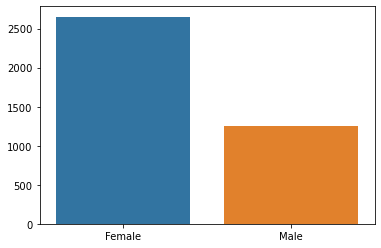

In [28]:
gender_dist = customers['Gender'].value_counts()
sns.barplot(gender_dist.index, gender_dist.values)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


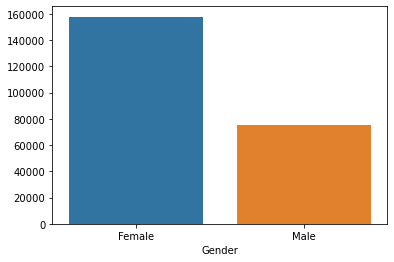

In [29]:
gender_total = customers.groupby('Gender')['Purchase Amount (USD)'].sum()
sns.barplot(gender_total.index, gender_total.values)
plt.show()

(array([0, 1]), [Text(0, 0, 'Female'), Text(0, 1, 'Male')])

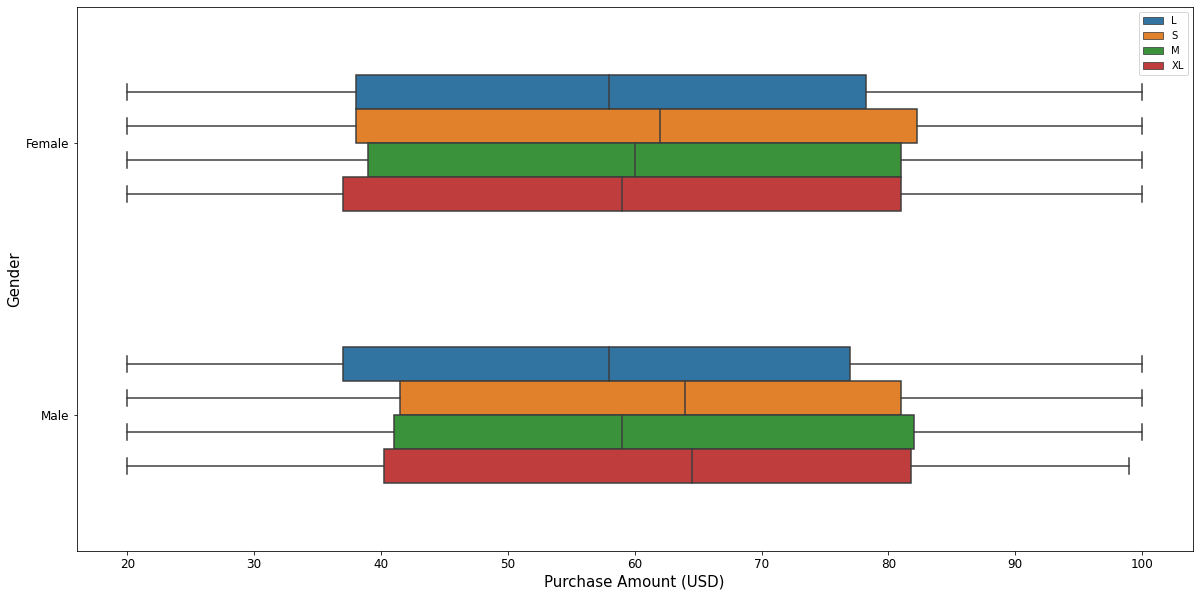

In [46]:
plt.figure(figsize=(20, 10))#set the fig size
sns.boxplot(data=customers, x="Purchase Amount (USD)", y="Gender", hue="Size", width=.5)
plt.legend(loc='upper right')
plt.xlabel("Purchase Amount (USD)", fontsize=15)
plt.ylabel("Gender", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


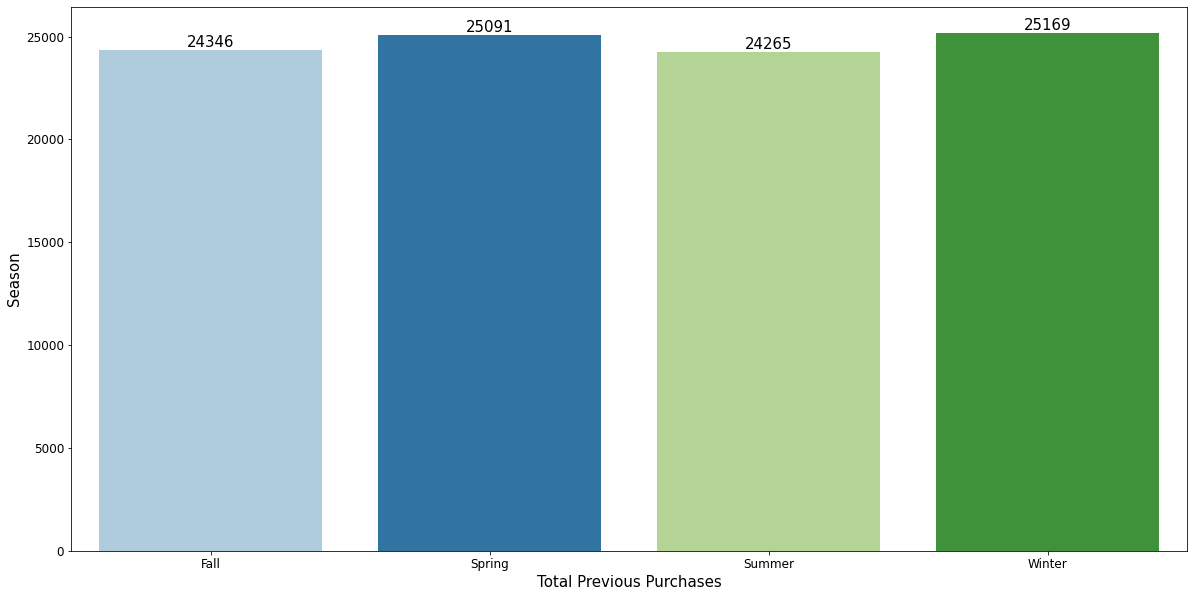

In [50]:
plt.figure(figsize=(20, 10))#set the fig size
prev_pur_total = customers.groupby('Season')['Previous Purchases'].sum()
ax = sns.barplot(prev_pur_total.index, prev_pur_total.values,palette="Paired")
plt.xlabel("Total Previous Purchases", fontsize=15)
plt.ylabel("Season", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.bar_label(ax.containers[0], fontsize=15)
plt.show();

Text(0.5, 1.0, 'Total Sales Category wise')

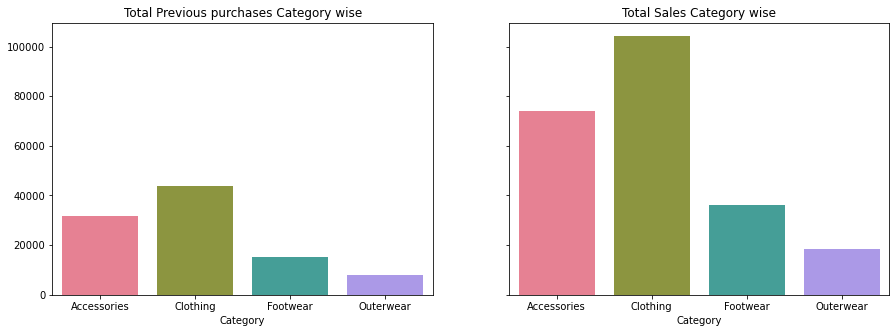

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')

# Previous purchases Category wise
prev_pur_total = customers.groupby('Category')['Previous Purchases'].sum()
sns.barplot(ax=axes[0],x=prev_pur_total.index, y=prev_pur_total.values,palette="husl")
axes[0].set_title("Total Previous purchases Category wise")

# Sales Category wise
sales_total = customers.groupby('Category')['Purchase Amount (USD)'].sum()
sns.barplot(ax=axes[1], x=sales_total.index, y=sales_total.values,palette="husl")
axes[1].set_title("Total Sales Category wise")

**Data Pre-Processing**

In [65]:
#create a copy from the original data
trans_df = customers.copy()

In [64]:
#transform Freq of purchases into recency by assuming given data are relevant to the period of 2023.01.01 - 2023.12.31
uniq_values = trans_df['Frequency of Purchases'].unique()
print(uniq_values)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [66]:
#replace each value
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Monthly'],30)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Every 3 Months'],90)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Annually'],364)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Fortnightly'],14)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Weekly'],7)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Quarterly'],120)
trans_df['Frequency of Purchases'] = trans_df['Frequency of Purchases'].replace(['Bi-Weekly'],1)
#assuming data is related to the previous year (31.12.2023 - 01.01.2023)

In [67]:
trans_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Female,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,14
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,14
2,3,50,Female,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7
4,5,45,Female,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,364


In [68]:
trans_df.rename(columns = {'Frequency of Purchases':'Recency (days)'}, inplace = True) 
trans_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Recency (days)
0,1,55,Female,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,14
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,14
2,3,50,Female,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7
4,5,45,Female,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Male,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,7
3896,3897,52,Male,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,1
3897,3898,46,Male,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,120
3898,3899,44,Male,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,7


### RFM Analysis

In [69]:
RFM = pd.DataFrame(trans_df[['Customer ID','Recency (days)','Previous Purchases','Purchase Amount (USD)']])

RFM.rename(columns={
          'Recency (days)' : 'Recency',
           'Previous Purchases':'Frequency',
           'Purchase Amount (USD)':'Monetary'},
           inplace = True
          )
RFM

,Customer ID,Recency,Frequency,Monetary
0,1,14,14,53
1,2,14,2,64
2,3,7,23,73
3,4,7,49,90
4,5,364,31,49
...,...,...,...,...
3895,3896,7,32,28
3896,3897,1,41,49
3897,3898,120,24,33
3898,3899,7,24,77


In [70]:
r = pd.qcut(RFM['Recency'], q=5, labels=range(5,0,-1))
f = pd.qcut(RFM['Frequency'], q=5, labels=range(1,6))
m = pd.qcut(RFM['Monetary'], q=5, labels=range(1,6))

In [71]:
RFM = RFM.assign(R=r.values, F=f.values, M=m.values)
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,1,14,14,53,4,2,3
1,2,14,2,64,4,1,3
2,3,7,23,73,5,3,4
3,4,7,49,90,5,5,5
4,5,364,31,49,1,4,2
...,...,...,...,...,...,...,...
3895,3896,7,32,28,5,4,1
3896,3897,1,41,49,5,5,2
3897,3898,120,24,33,2,3,1
3898,3899,7,24,77,5,3,4


In [72]:
RFM['RFM_score_total'] = RFM[['R','F','M']].sum(axis=1)
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_score_total
0,1,14,14,53,4,2,3,9
1,2,14,2,64,4,1,3,8
2,3,7,23,73,5,3,4,12
3,4,7,49,90,5,5,5,15
4,5,364,31,49,1,4,2,7
...,...,...,...,...,...,...,...,...
3895,3896,7,32,28,5,4,1,10
3896,3897,1,41,49,5,5,2,12
3897,3898,120,24,33,2,3,1,6
3898,3899,7,24,77,5,3,4,12


### K-Means Clustering

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

**Identify number of clusters fitted into the data**

<h4 style='color:red'>1. Elbow Method</h4>

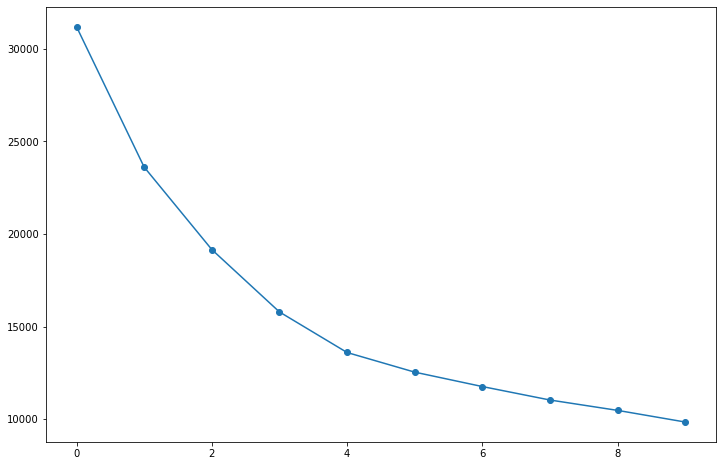

In [74]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

<h4 style='color:blue'>2. Silhouette analysis</h4>

In [77]:
df_silh = RFM[['RFM_score_total']]

For n_clusters = 2, the average silhouette_score is : 0.5973982618960071
For n_clusters = 3, the average silhouette_score is : 0.5840126644440028
For n_clusters = 4, the average silhouette_score is : 0.6294679124814538
For n_clusters = 5, the average silhouette_score is : 0.6634247979169292
For n_clusters = 6, the average silhouette_score is : 0.6828743762117214


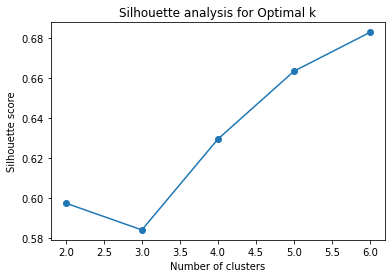

In [78]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_silh)

# Range of clusters to try
min_clusters = 2
max_clusters = 6

# Initialize lists to store silhouette scores
silhouette_scores = []

# Perform silhouette analysis for different number of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Fit KMeans clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal k')
plt.show()


### Identify Loyalty Tiers

In [79]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [80]:
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_score_total,Clusters
0,1,14,14,53,4,2,3,9,2
1,2,14,2,64,4,1,3,8,2
2,3,7,23,73,5,3,4,12,1
3,4,7,49,90,5,5,5,15,1
4,5,364,31,49,1,4,2,7,3
...,...,...,...,...,...,...,...,...,...
3895,3896,7,32,28,5,4,1,10,4
3896,3897,1,41,49,5,5,2,12,4
3897,3898,120,24,33,2,3,1,6,4
3898,3899,7,24,77,5,3,4,12,1


In [81]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

C:\Users\DELL\AppData\Local\Temp\ipykernel_2612\4293404447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,37.923986,32.690878,81.157095
2,47.112616,10.040644,55.251482
3,364.000000,24.561189,60.173077
4,49.923157,35.574247,38.753894


In [83]:
#define a name for each tier/cluster
def func(row):
    if row["Clusters"]==4:
        return 'Gold Tier'
    elif row["Clusters"]==2:
        return 'Platinum Tier'
    elif row["Clusters"]==1:
        return 'Silver Tier'
    else:
        return 'Bronze Tier'

In [84]:
RFM['Membership Group']=RFM.apply(func, axis=1)
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_score_total,Clusters,Membership Group
0,1,14,14,53,4,2,3,9,2,Platinum Tier
1,2,14,2,64,4,1,3,8,2,Platinum Tier
2,3,7,23,73,5,3,4,12,1,Silver Tier
3,4,7,49,90,5,5,5,15,1,Silver Tier
4,5,364,31,49,1,4,2,7,3,Bronze Tier
...,...,...,...,...,...,...,...,...,...,...
3895,3896,7,32,28,5,4,1,10,4,Gold Tier
3896,3897,1,41,49,5,5,2,12,4,Gold Tier
3897,3898,120,24,33,2,3,1,6,4,Gold Tier
3898,3899,7,24,77,5,3,4,12,1,Silver Tier


In [85]:
result=RFM['Membership Group'].value_counts()
result

Silver Tier      1184
Platinum Tier    1181
Gold Tier         963
Bronze Tier       572
Name: Membership Group, dtype: int64

<AxesSubplot:>

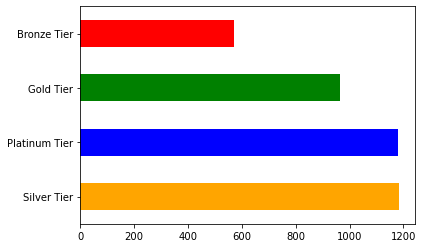

In [86]:
result.plot(kind="barh", color=["Orange","Blue","Green","Red"])

In [88]:
df_merged = pd.merge(trans_df, RFM[['Customer ID','Membership Group']], on='Customer ID')
df_merged

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Recency (days),Membership Group
0,1,55,Female,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,14,Platinum Tier
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,14,Platinum Tier
2,3,50,Female,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7,Silver Tier
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7,Silver Tier
4,5,45,Female,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,364,Bronze Tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Male,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,7,Gold Tier
3896,3897,52,Male,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,1,Gold Tier
3897,3898,46,Male,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,120,Gold Tier
3898,3899,44,Male,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,7,Silver Tier


In [89]:
# Save the dataframe to a CSV file
df_merged.to_csv('F:\\Uni\\YEAR 03\\FYP\\FYP016\\data\\processed_dataset.csv', index=False)

### Classification - Random Forest Classifier

In [90]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt

In [93]:
pro_df = pd.read_csv("F:\\Uni\\YEAR 03\\FYP\\FYP016\\data\\processed_dataset.csv")
pro_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Recency (days),Membership Group
0,1,55,Female,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,14,Platinum Tier
1,2,19,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,14,Platinum Tier
2,3,50,Female,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,7,Silver Tier
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,7,Silver Tier
4,5,45,Female,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,364,Bronze Tier


In [94]:
pro_df.shape

(3900, 20)

In [95]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [96]:
(pro_df.isna().sum()/pro_df.shape[0])*100

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Recency (days)              0.0
Membership Group            0.0
dtype: float64

### Feature Selection

In [97]:
#drop unrelated variables
drop_pro_df = pro_df.drop(['Review Rating','Subscription Status','Payment Method','Discount Applied','Promo Code Used'],axis=1)

Handling Categorical variables - Using Label Encoder

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [101]:
label_encoded_Df = pd.DataFrame()

In [102]:
drop_pro_df["Gender"] = label_encoder.fit_transform(drop_pro_df["Gender"])
drop_pro_df["Item Purchased"] = label_encoder.fit_transform(drop_pro_df["Item Purchased"])
drop_pro_df["Location"] = label_encoder.fit_transform(drop_pro_df["Location"])
drop_pro_df["Size"] = label_encoder.fit_transform(drop_pro_df["Size"])
drop_pro_df["Color"] = label_encoder.fit_transform(drop_pro_df["Color"])
drop_pro_df["Season"] = label_encoder.fit_transform(drop_pro_df["Season"])
drop_pro_df["Shipping Type"] = label_encoder.fit_transform(drop_pro_df["Shipping Type"])
drop_pro_df["Preferred Payment Method"] = label_encoder.fit_transform(drop_pro_df["Preferred Payment Method"])
drop_pro_df["Membership Group"] = label_encoder.fit_transform(drop_pro_df["Membership Group"])
drop_pro_df["Category"] = label_encoder.fit_transform(drop_pro_df["Category"])

In [103]:
drop_pro_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Shipping Type,Previous Purchases,Preferred Payment Method,Recency (days),Membership Group
0,1,55,0,2,1,53,16,0,7,3,1,14,5,14,2
1,2,19,0,23,1,64,18,0,12,3,1,2,1,14,2
2,3,50,0,11,1,73,20,2,12,1,2,23,2,7,3
3,4,21,0,14,2,90,38,1,12,1,3,49,4,7,3
4,5,45,0,2,1,49,36,1,21,1,2,31,4,364,0


In [104]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(drop_pro_df.drop(labels=['Membership Group'], axis=1),
    drop_pro_df['Membership Group'],
    test_size=0.3,
    random_state=0)

In [105]:
X_train.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Shipping Type,Previous Purchases,Preferred Payment Method,Recency (days)
3712,3713,51,1,2,1,72,36,1,21,1,0,24,4,120
1703,1704,39,0,0,0,22,4,1,1,1,3,12,0,364
122,123,40,0,0,0,40,46,0,3,1,0,44,1,14
2085,2086,69,0,11,1,49,31,1,20,0,2,38,3,7
1371,1372,40,0,13,1,64,23,1,4,1,5,42,2,30


In [106]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([7.85737022e-03, 0.00000000e+00, 1.23588259e-02, 0.00000000e+00,
       9.58771919e-05, 3.34252553e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.35365229e-02, 2.88182910e-03, 4.16034679e-01,
       4.89138003e-03, 4.33855435e-01])

In [107]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Recency (days)              0.433855
Previous Purchases          0.416035
Purchase Amount (USD)       0.334253
Season                      0.013537
Gender                      0.012359
Customer ID                 0.007857
Preferred Payment Method    0.004891
Shipping Type               0.002882
Category                    0.000096
Age                         0.000000
Item Purchased              0.000000
Location                    0.000000
Size                        0.000000
Color                       0.000000
dtype: float64

In [108]:
from sklearn.feature_selection import SelectKBest

In [109]:
#select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Purchase Amount (USD)', 'Season', 'Previous Purchases',
       'Preferred Payment Method', 'Recency (days)'],
      dtype='object')

**Model Development**

In [110]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [111]:
input_feat_df= drop_pro_df[['Age','Color','Recency (days)','Previous Purchases','Purchase Amount (USD)']]
input_feat_df

,Age,Color,Recency (days),Previous Purchases,Purchase Amount (USD)
0,55,7,14,14,53
1,19,12,14,2,64
2,50,12,7,23,73
3,21,12,7,49,90
4,45,21,364,31,49
...,...,...,...,...,...
3895,40,21,7,32,28
3896,52,23,1,41,49
3897,46,8,120,24,33
3898,44,3,7,24,77


In [112]:
feat_arr = input_feat_df.to_numpy()
feat_arr

array([[ 55,   7,  14,  14,  53],
       [ 19,  12,  14,   2,  64],
       [ 50,  12,   7,  23,  73],
       ...,
       [ 46,   8, 120,  24,  33],
       [ 44,   3,   7,  24,  77],
       [ 52,   0, 120,  33,  81]], dtype=int64)

In [113]:
output_feat_df = drop_pro_df[['Membership Group']]
output_feat_df

,Membership Group
0,2
1,2
2,3
3,3
4,0
...,...
3895,1
3896,1
3897,1
3898,3


In [114]:
target_arr = output_feat_df.to_numpy()
target_arr

array([[2],
       [2],
       [3],
       ...,
       [1],
       [3],
       [3]])

In [118]:
X = feat_arr
Y = target_arr

In [119]:
X.shape

(3900, 5)

In [120]:
Y.shape

(3900, 1)

In [122]:
clf = RandomForestClassifier()
clf.fit(X, Y)
print(clf.feature_importances_)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2612\1677926169.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


[0.01380671 0.01277783 0.29587463 0.34370499 0.33383585]


In [123]:
X[0]

array([55,  7, 14, 14, 53], dtype=int64)

In [124]:
print(clf.predict([[5.1, 3.5, 1.4, 20, 53]]))

[2]


In [125]:
print(clf.predict(X[[0]]))

[2]


In [126]:
print(clf.predict_proba(X[[0]]))

[[0. 0. 1. 0.]]


In [128]:
clf.fit(feat_arr, target_arr)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_2612\3954247083.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(feat_arr, target_arr)


((3120, 5), (3120, 1))

In [129]:
X_test.shape, Y_test.shape

((780, 5), (780, 1))

In [131]:
clf.fit(X_train, Y_train)
print(clf.predict(X_test))

[3 2 3 3 2 0 2 3 1 0 2 3 1 1 3 3 2 2 3 0 2 2 2 0 3 1 3 2 2 1 3 2 0 3 2 3 1
 0 1 1 3 1 0 3 0 1 1 0 3 3 2 1 0 2 2 3 3 3 0 2 2 3 3 2 3 1 2 1 2 2 1 3 2 2
 2 1 1 3 1 2 3 3 1 0 3 3 1 1 1 2 1 0 2 3 3 1 3 3 2 2 1 0 0 3 1 1 3 0 1 1 3
 0 2 1 2 1 2 2 1 2 1 3 0 0 0 2 0 0 0 1 2 2 0 0 2 3 2 1 1 2 2 1 1 1 2 0 3 1
 3 3 3 3 0 2 3 1 3 2 1 2 3 1 3 0 2 1 1 0 1 3 2 1 1 1 0 2 1 0 3 1 1 3 2 3 1
 0 2 0 3 3 2 2 0 3 2 1 1 3 2 0 0 2 3 1 2 3 3 3 0 3 2 2 3 1 3 2 0 2 3 3 1 3
 3 3 3 1 3 1 0 0 3 3 0 3 1 2 3 2 2 2 3 1 1 2 1 3 2 1 1 2 1 1 1 3 2 3 3 3 1
 2 2 1 3 2 1 3 3 2 3 1 3 3 0 2 1 0 2 2 1 3 3 0 0 2 0 3 3 1 1 0 2 3 3 0 1 0
 1 1 2 0 2 2 1 0 2 3 3 0 1 2 1 3 3 1 2 2 0 3 1 1 3 1 2 2 3 3 3 1 2 2 3 0 2
 3 2 1 2 2 2 0 2 0 1 2 2 2 2 2 0 2 3 0 1 2 2 3 3 1 2 2 3 3 3 2 1 3 3 3 2 2
 2 1 1 2 2 2 3 1 2 1 3 1 2 0 0 3 2 3 2 1 2 3 2 1 3 3 2 1 2 2 3 1 1 0 1 1 0
 3 0 3 3 2 1 1 2 2 0 3 2 2 3 2 3 1 3 2 3 2 2 2 3 2 3 2 3 1 2 1 0 2 0 2 2 2
 1 1 2 0 3 2 3 3 0 3 3 1 1 1 3 3 3 3 2 0 3 0 2 3 3 3 3 2 2 1 0 1 3 1 2 2 0
 2 3 2 1 1 1 1 3 1 3 2 1 

C:\Users\DELL\AppData\Local\Temp\ipykernel_2612\4030680482.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


In [133]:
print(Y_test)

[[3]
 [2]
 [3]
 [3]
 [2]
 [0]
 [2]
 [3]
 [1]
 [0]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [2]
 [2]
 [3]
 [0]
 [2]
 [2]
 [2]
 [0]
 [3]
 [1]
 [3]
 [2]
 [2]
 [1]
 [3]
 [2]
 [0]
 [3]
 [2]
 [3]
 [1]
 [0]
 [1]
 [1]
 [3]
 [1]
 [0]
 [3]
 [0]
 [1]
 [1]
 [0]
 [3]
 [3]
 [2]
 [1]
 [0]
 [2]
 [2]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [3]
 [3]
 [2]
 [3]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [3]
 [2]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [2]
 [3]
 [3]
 [1]
 [0]
 [3]
 [3]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [2]
 [3]
 [3]
 [1]
 [1]
 [3]
 [2]
 [2]
 [1]
 [0]
 [0]
 [3]
 [1]
 [1]
 [3]
 [0]
 [1]
 [1]
 [3]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [3]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [3]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [0]
 [2]
 [3]
 [1]
 [3]
 [2]
 [1]
 [2]
 [3]
 [1]
 [3]
 [0]
 [2]
 [2]
 [1]
 [0]
 [1]
 [3]
 [2]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [3]
 [1]
 [1]
 [3]
 [2]
 [3]
 [1]
 [0]
 [2]
 [0]
 [3]
 [3]
 [3]
 [2]
 [0]
 [3]
 [2]
 [1]
 [1]
 [3]
 [2]
 [0]


In [134]:
print(clf.score(X_test, Y_test))

0.9897435897435898
